### Dimentionality reduction: PCA

Irene Grone

In this workbook is demontrated an application of Principal Component Analysis (PCA) for dimentionality reduction and a visual example from 3-dimensional to 2-dimensional variable space is shown.

### Content

<ul>
    <li>Dataset description</li>
    <li>Exploring the data</li>
    <li>Principal Component Analysis</li>
    <li>Other dimentionality reduction methods</li>
</ul>

### Dataset description

Source:<br>
> **Citation**:Dataset: <b>HTRU2</b> on UCI Machine Learning Repository <a href="https://archive.ics.uci.edu/ml/datasets/HTRU2">https://archive.ics.uci.edu/ml/datasets/HTRU2</a> donate on 14/02/2017<br> Dr Robert Lyon, University of Manchester, School of Physics and Astronomy, Alan Turing Building, Manchester M13 9PL, United Kingdom, robert.lyon '@' manchester.ac.uk [1] [2]

HTRU2 dataset describes a sample of astronomical objects that are candidate to be pulsar; the data were collected during the High Time Resolution Universe Survey (South) [3]  
Pulsars are a type of Neutron star of great scientific importance. Tehy rotate and emit a detectable periodical pattern of broadband radio emissions. Each pulsar produces a slightly different emission with each rotation: the candidate signal is averaged over many rotations. The detection of true pulsars is difficult due to radio frequency interference and noise, this makes the recognition of a true pulsar signal hard to determine. The the candidates astronomical objects have been manually labelled Pulsar or non Pulsar (binary target).

In [1]:
# coding: utf-8
import sys
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.decomposition import PCA

### Exploring the data

The dataset contains 17898 data points with 9 variables.

In [2]:
data = pd.read_csv('data/pulsar_stars.csv')
data.shape

(17898, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Each row describe a candidate Pulsar with 8 attributes (continuous variables of type float64) and the target class variable (of type int64). The continuous variables are statistics obtained from the integrated pulse profile that describe a longitude-resolved version of the radio signal and the DM-SNR curve that have been averaged in time and frequency [4].  The feature data are extracted from candidate files using the PulsarFeatureLab tool [5]. There are no missing values.

In [4]:
data['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

The target class is a binary variable, it has 16259 non Pulsar (0) examples and 1639 Pulsar (1) examples. The dataset is unbalanced: we could have problems in model training the number of data points of class Pulsar is much smaller than non Pulsar.

A sample of the data:

In [5]:
data.sample(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
11572,93.187500,40.945037,0.464309,1.368184,2.144649,18.927161,9.459224,93.447157,0
4534,84.773438,40.689797,0.763434,1.442737,9.671405,36.351589,3.975499,15.625425,0
11394,117.257812,47.553300,0.432578,0.298295,6.427258,29.499145,5.259671,29.239542,0
17061,88.968750,37.765299,0.793061,2.132050,2.302676,14.451928,9.365138,114.082731,0
3026,112.312500,47.158600,0.556696,0.653353,1.229097,14.194870,13.916682,211.677189,0


and the main aggregate statistics for the variables in the dataset: count of data, mean, standard deviation, minimum, maximum and quartiles

In [6]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Renaming the features for readability

In [7]:
features_names = ["mean_integrated", "std_integrated", "exKurt_integrated", "skewness_integrated", "mean_DM-SNR", "std_DM-SNR", "exKurt_DM-SNR", "skewness_DM-SNR", "target"]
data.columns = features_names

Exploring features and target with pairplot, the colour indicates non candidate pulsar (blue) and cadidate pulsar (orange).

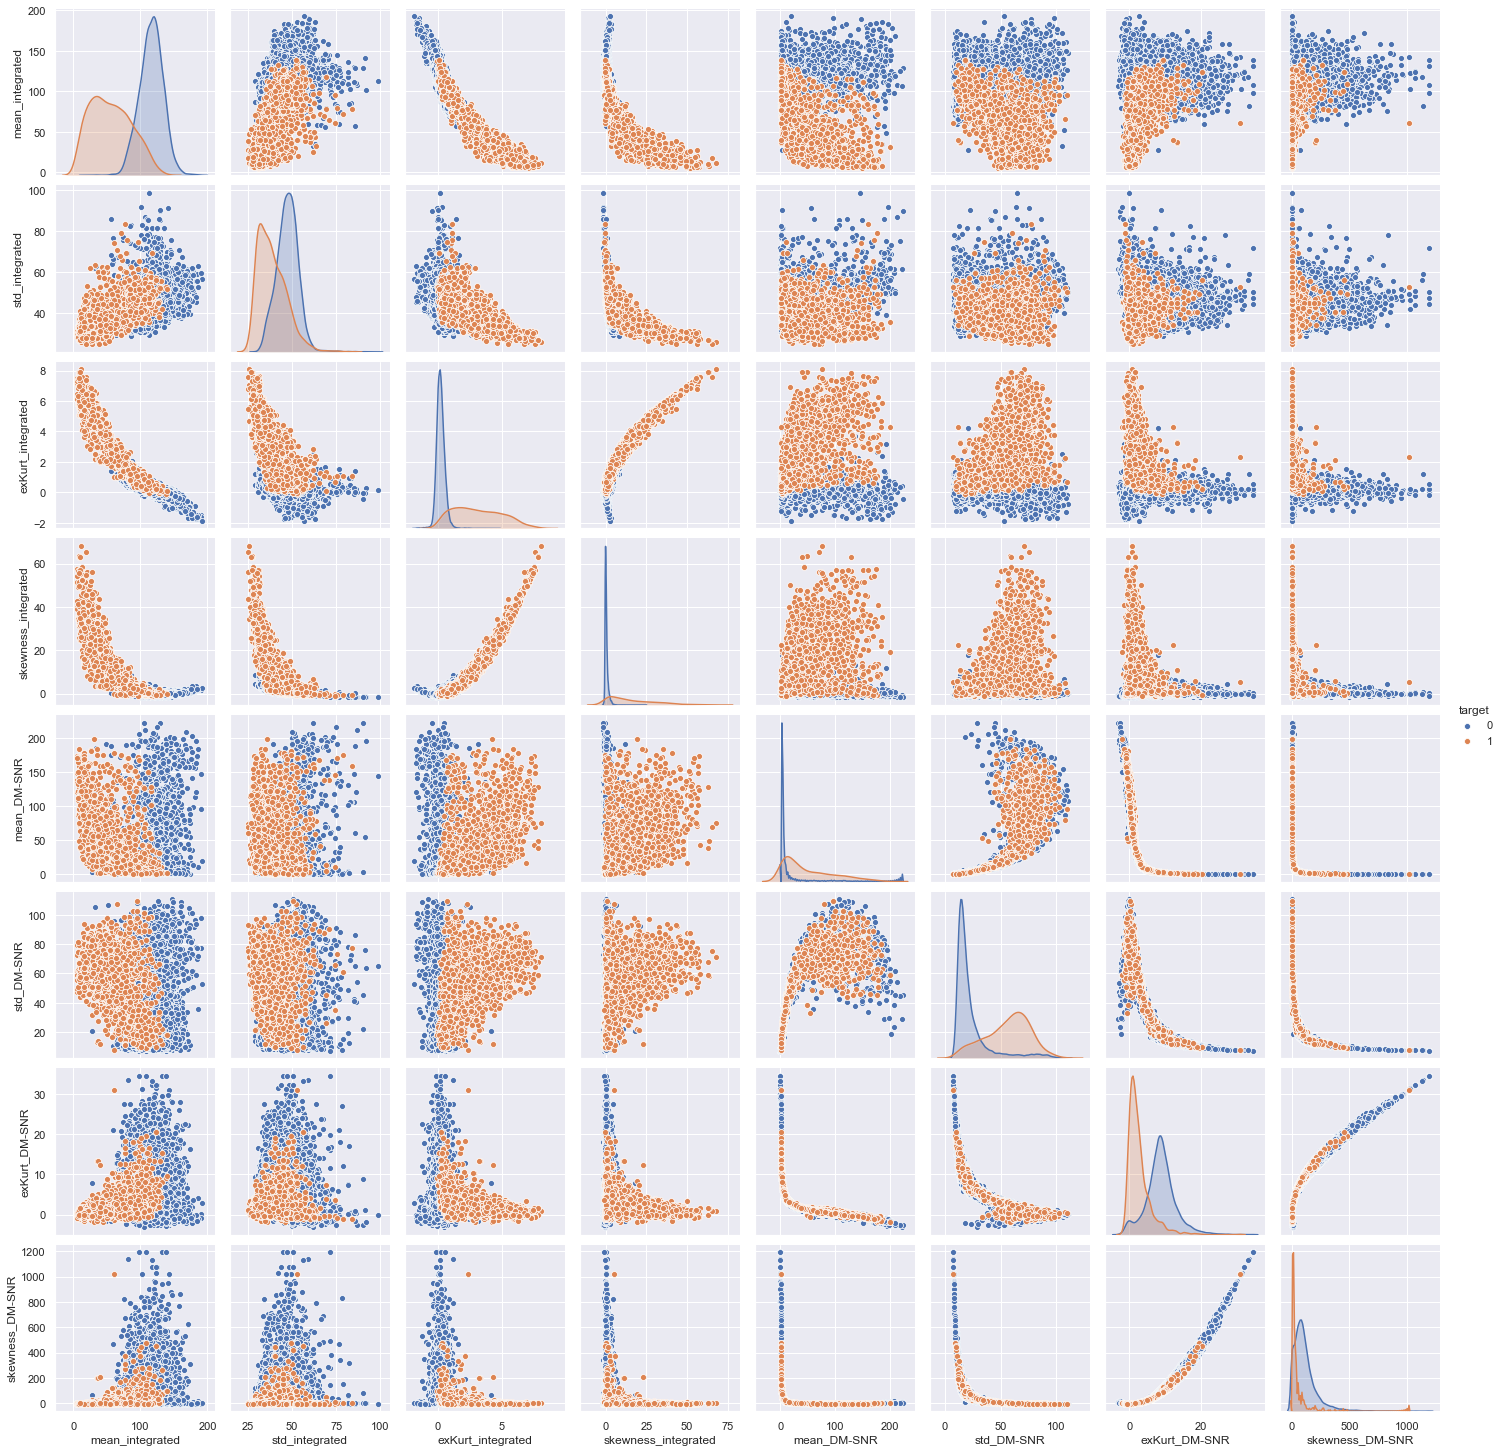

In [8]:
g = sns.pairplot(data, hue="target")

The ranges of the variables are very different, they need to be rescaled and normalised.

### Principal Component Analysis

PCA algorithm in scikit-learn performs scaling by default, but it is usefull to do the scaling at this stage to evaluate graphically the variability of the features.

In [9]:
# separate features and target
X_pulsar = data.iloc[:, :8]
y_pulsar = data['target']

In [10]:
# scaling the dataset
X_scaled = preprocessing.scale(X_pulsar)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = features_names[:8]

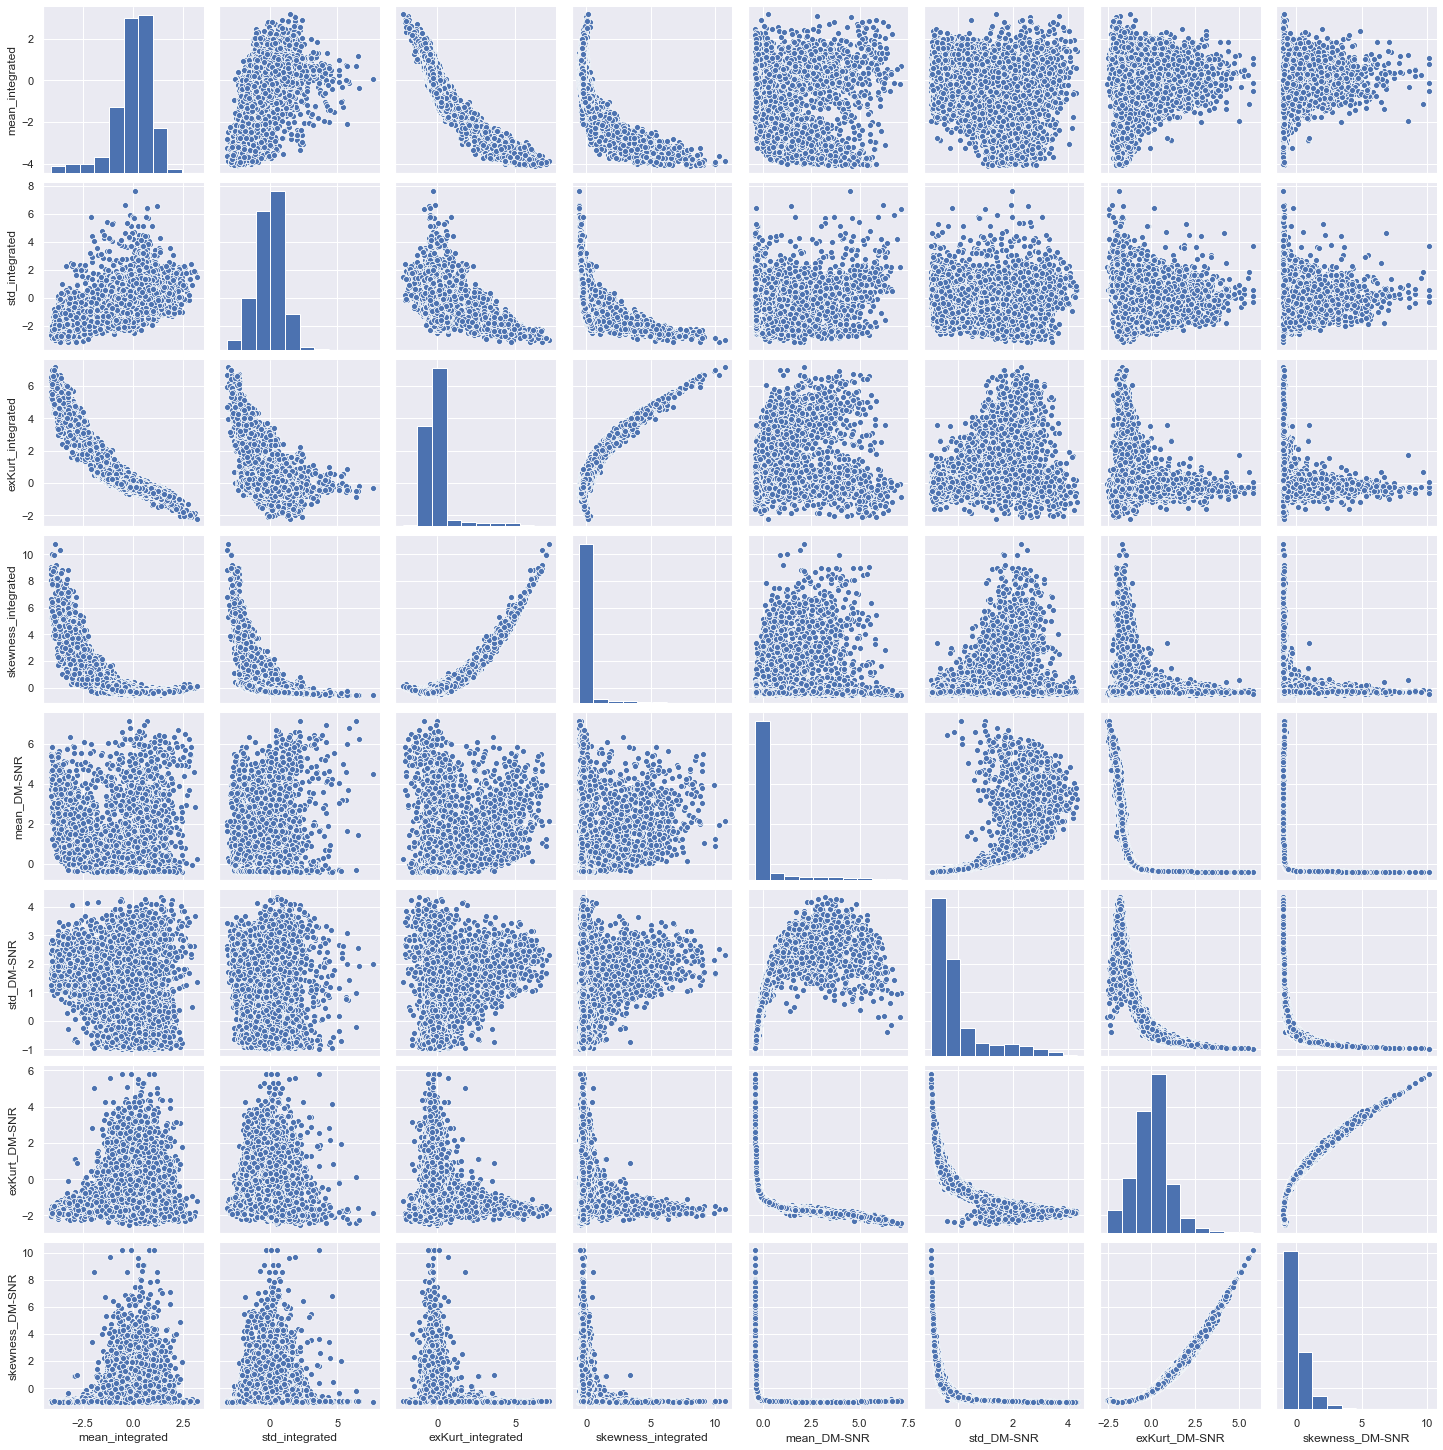

In [11]:
g2 = sns.pairplot(X_scaled)

#### Application and visualization from 3D to 2D feature space.

To visualise the application of PCA a reduced dataset with 3 variables and the target is needed. Let's consider which features will preserve class separability and the maximum amount of variance in order to loose less information as possible. Plotting 4 different combinations of three features in 3D:

<ul>
    <li>Group 1:<br>exKurt_integrated, skewness_DM-SNR, exKurt_DM-SNR</li>
    <li>Group 2:<br>mean_integrated, exKurt_DM-SNR, skewness_DM-SNR</li>
    <li>Group 3:<br>mean_integrated, mean_DM-SNR, std_DM-SNR</li>
    <li>Group 4:<br>skewness_integrated, skewness_DM-SNR, exKurt_DM-SNR</li>
</ul>

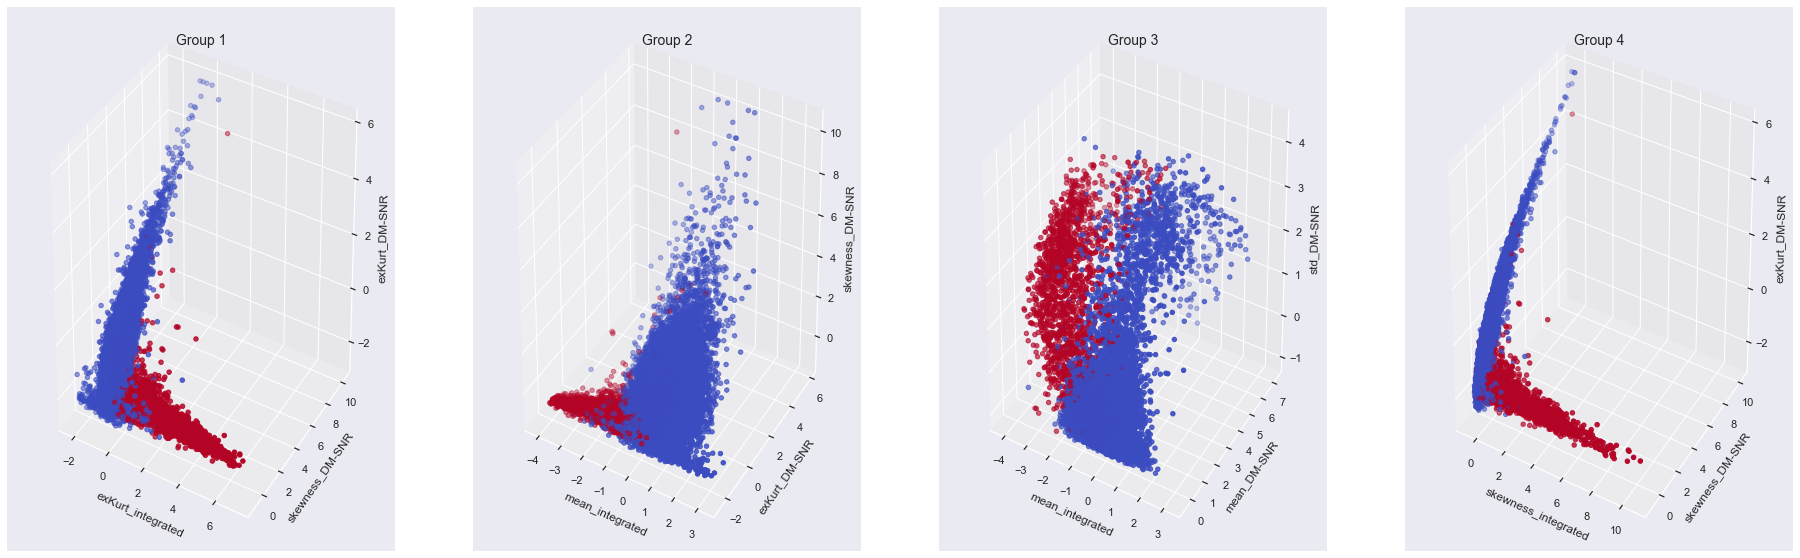

In [12]:
fig = plt.figure(figsize=(32, 10))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter(X_scaled["exKurt_integrated"], X_scaled["skewness_DM-SNR"], X_scaled["exKurt_DM-SNR"], c=y_pulsar, cmap=cm.coolwarm)
ax.set_title('Group 1', fontsize=14)
ax.set_xlabel("exKurt_integrated")
ax.set_ylabel("skewness_DM-SNR")
ax.set_zlabel("exKurt_DM-SNR")

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter(X_scaled["mean_integrated"], X_scaled["exKurt_DM-SNR"], X_scaled["skewness_DM-SNR"], c=y_pulsar, cmap=cm.coolwarm)
ax.set_title('Group 2', fontsize=14)
ax.set_xlabel("mean_integrated")
ax.set_ylabel("exKurt_DM-SNR")
ax.set_zlabel("skewness_DM-SNR")

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter(X_scaled["mean_integrated"], X_scaled["mean_DM-SNR"], X_scaled["std_DM-SNR"], c=y_pulsar, cmap=cm.coolwarm)
ax.set_title('Group 3', fontsize=14)
ax.set_xlabel("mean_integrated")
ax.set_ylabel("mean_DM-SNR")
ax.set_zlabel("std_DM-SNR")

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter(X_scaled["skewness_integrated"], X_scaled["skewness_DM-SNR"], X_scaled["exKurt_DM-SNR"], c=y_pulsar, cmap=cm.coolwarm)
ax.set_title('Group 4', fontsize=14)
ax.set_xlabel("skewness_integrated")
ax.set_ylabel("skewness_DM-SNR")
ax.set_zlabel("exKurt_DM-SNR")

plt.show()

From the pairplots and the 3D plot above, group 1 and 4 seem to be the group of predictors that preserve the most information and separete the classes in the target variable. Group 4 features are selected for reduction to 2 dimention: looking at the ranges of the axes they have the greatest variability. Predictors: Skewness of the integrated profile, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve; predicted dimension: target_class.

Preparation of the reduced dataset. We have already target_calss in y_pulsar.

In [13]:
features = X_scaled[["skewness_integrated", "skewness_DM-SNR", "exKurt_DM-SNR"]]

We reduce the 3-dimensional space to a 2-dimensional space with Principal Component Analysis, PCA, and print the first and second component vectors.

In [14]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(features)
X_reduced = pd.DataFrame(X_reduced)
X_reduced.columns = ['Pca_1', 'Pca_2']

In [15]:
pca.components_

array([[-0.33677613,  0.65517998,  0.67625515],
       [ 0.93605231,  0.31070303,  0.16513541]])

Let's consider the importance of each component through the proportion of variance explained, available via the variable explained_variance_ratio_; we see that the first PC count for the 68.6% of variance in the dataset and the second PC count for the 29.1%. The remaining variance is due to the third component.

In [16]:
pca.explained_variance_ratio_

array([0.68623974, 0.29133774])

Projections of the dataset on the 3D space of the selected group of predictors and on the reduced space of the PCA components.

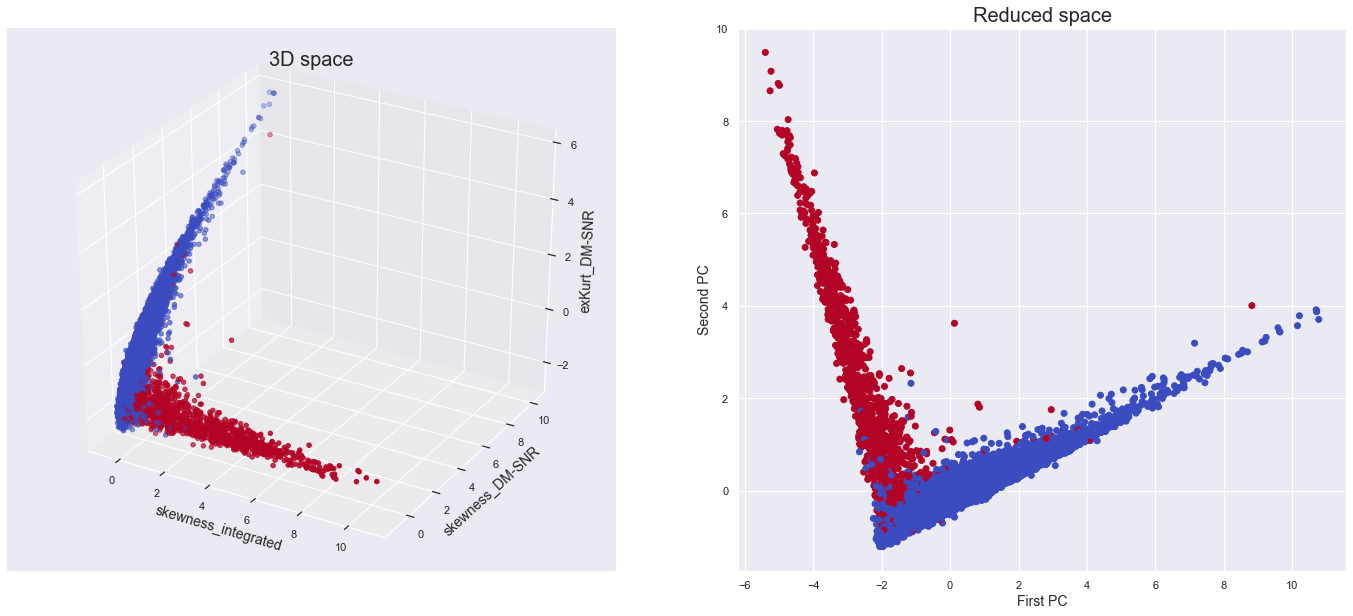

In [17]:
fig2 = plt.figure(figsize=(24, 10))

ax2 = fig2.add_subplot(1, 2, 1, projection='3d')
ax2.scatter(X_scaled["skewness_integrated"], X_scaled["skewness_DM-SNR"], X_scaled["exKurt_DM-SNR"], c=y_pulsar, cmap=cm.coolwarm)
ax2.set_title('3D space', fontsize=20)
ax2.set_xlabel("skewness_integrated", fontsize=14)
ax2.set_ylabel("skewness_DM-SNR", fontsize=14)
ax2.set_zlabel("exKurt_DM-SNR", fontsize=14)

ax2 = fig2.add_subplot(1, 2, 2)
ax2.scatter(X_reduced["Pca_1"], X_reduced["Pca_2"], c=y_pulsar, cmap=cm.coolwarm)
ax2.set_title('Reduced space', fontsize=20)
ax2.set_xlabel("First PC", fontsize=14)
ax2.set_ylabel("Second PC", fontsize=14)

plt.show()

#### Application of PCA on the full dataset.



In [18]:
pca_full = PCA(n_components = 8)
X_pca = pca_full.fit_transform(X_pulsar)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['Pca_1', 'Pca_2','Pca_3','Pca_4','Pca_5','Pca_6','Pca_7','Pca_8']

Let's now look at the transformed dataset with the data points projcted on the principal components:

In [19]:
X_pca.head()

,Pca_1,Pca_2,Pca_3,Pca_4,Pca_5,Pca_6,Pca_7,Pca_8
0,-27.191086,-29.677875,19.480712,3.042950,3.118919,4.331896,0.039214,0.010220
1,24.476215,-6.024175,-11.394628,5.335957,14.002387,2.178598,-0.660774,-0.012389
2,-39.938920,-10.828048,-14.768748,2.101549,-4.438677,-3.470541,-0.104414,0.126597
3,-48.000825,-29.833257,16.330411,2.836173,5.304497,4.493957,0.352786,-0.061102
4,147.919433,18.562548,-22.296929,1.584217,-0.318674,-3.915930,-0.245921,0.084501


Let's consider now the proportion of variance explained by each component via the variable explained_variance_ratio_ and let's plot the values against the number of components.

In [20]:
list(pca_full.explained_variance_ratio_)

[0.8710530410334033,
 0.07819343827020464,
 0.04115622899218937,
 0.006159676909447904,
 0.002437179518516093,
 0.0009585784903758286,
 3.9057099238889515e-05,
 2.7996866239847405e-06]

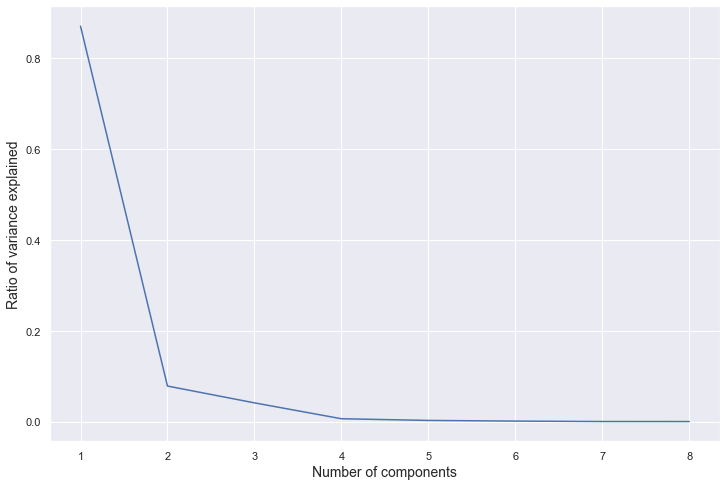

In [21]:
fig3 = plt.figure(figsize=(12, 8))
plt.plot(np.arange(1,9), pca_full.explained_variance_ratio_)
plt.ylabel('Ratio of variance explained', fontsize=14)
plt.xlabel('Number of components', fontsize=14)
plt.show()

From the plot is it clear that the first 3 components give most of the informations. The first PC counts for the 87.1% of variance, the second PC counts for the 7.8%, the third PC counts for the 4.1% of variance, the remaining variance is due to the other 5 components.  
The plot below presents the cumulative sum of the ratio of variance explained, the first 3 components explain the 99% of variance: a reduced dataset with the first 3 PC, could be used in a clasification model instead of the full dataset.

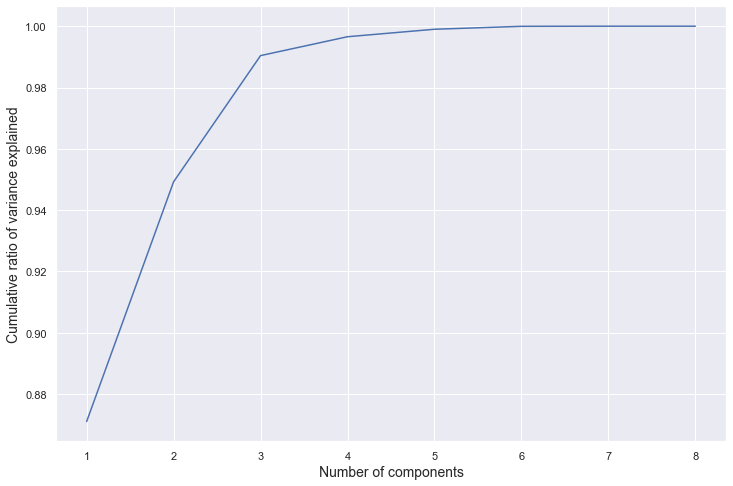

In [22]:
fig4 = plt.figure(figsize=(12, 8))
plt.plot(np.arange(1,9), np.cumsum(pca_full.explained_variance_ratio_))
plt.ylabel('Cumulative ratio of variance explained', fontsize=14)
plt.xlabel('Number of components', fontsize=14)
plt.show()

#### Other imentionality reduction methods

In general different techniques can be applied to determine which are the key attributes of the dataset and then select the most informative that then are used in the classification model:
<ul>
    <li>Correlation between attributes<br>if there are pairs of feature highly correlated they both bring the same information, for each pair consider only one of the feature and exclude the othe</li>
    <li>Random Forest and feature importance<br>perform random forest classification setting the number of feature to be used at each split; alternatively apply the algorithm on a representative subset of the data and then retrieve the feature importance results and select the most important features</li>
    <li>Forward feature selection<br>choose a classification model, set a significance level, fit the model first with each individual feature, select the feature with the minimum p-value; fit the model with combination of two features, one is from previous step, select the pair of features with minimum p-value; repeat the process untill we select all the features with p-value below significance level</li>
    <li>Backward feature elimination<br></li>
</ul>

#### Resources

Matplotlib official documentation, available on line at https://matplotlib.org/3.1.1/

Scikit-learn official documentation, available on line at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Scikit-learn official documentation, available on line at https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance

A. Géron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow", 2nd Edition, O'Reilly Media, Inc., 2019

#### References

[1] R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

[2] R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1

[3] [1] M. J. Keith et al., The High Time Resolution Universe Pulsar Survey - I. System Configuration and Initial Discoveries,2010, Monthly Notices of the Royal Astronomical Society, vol. 409, pp. 619-627. DOI: 10.1111/j.1365-2966.2010.17325.x

[4] R. J. Lyon, 'Why Are Pulsars Hard To Find?', PhD Thesis, University of Manchester, 2016.

[5] R. J. Lyon, 'PulsarFeatureLab', 2015, [<a href='https://figshare.com/articles/Pulsar_Feature_Lab/1536472/1'>Web Link</a>].

[6] G. James, D. Witten, T. Hastie, R. Tibisirani, "An Introduction to statistical learning", Springer, 2013